In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

data = pd.read_csv(filename)

# Display available columns
print("Columns before cleaning:", data.columns)

Saving Literacy Rate inflation GDP in Bangladesh Dataset - RAW.csv to Literacy Rate inflation GDP in Bangladesh Dataset - RAW (2).csv
Columns before cleaning: Index(['Year', 'Literacy Rate(%)', 'Population ', 'Population growth rate (%)',
       'Migrant Population (Estimated)', 'Net Migration Rate', 'Growth Rate',
       'Inflation Rate (%)', 'Annual Change (%)', 'GNI (Billion USD)',
       ...
       'Military Size ', 'Annual % Change\r', 'Suicide Rate',
       'Suicide Rate - Male', 'Suicide Rate - Female',
       'Education Spending (% of GDP)', 'Annual Change.9',
       'Arable Land -Hectares', 'Per Capita', 'Percent'],
      dtype='object', length=118)


In [6]:
# Clean column names
data.columns = data.columns.str.strip().str.replace(r'[\r\n]', '', regex=True)

# Print cleaned columns
print("Columns after cleaning:", data.columns)

# Convert GDP column (remove "$" and "B")
if 'GDP' in data.columns:
    data['GDP'] = data['GDP'].astype(str).str.replace(r'[$B,]', '', regex=True)
    data['GDP'] = pd.to_numeric(data['GDP'], errors='coerce')

# Convert percentage columns to float
def convert_percent(col):
    if col.dtypes == 'object' and col.str.endswith('%').any():
        col = col.str.replace('%', '', regex=True).str.replace(',', '')
        col = pd.to_numeric(col.str.replace('-', 'NaN', regex=True), errors='coerce') / 100
        return col
    return col

# Convert numeric columns stored as strings
def convert_numeric(col):
    if col.dtypes == 'object':
        return pd.to_numeric(col.str.replace(',', '').str.replace('-', 'NaN', regex=True), errors='coerce')
    return col

# Apply cleaning functions
data = data.apply(convert_percent)
data = data.apply(convert_numeric)

# Print summary after conversion
print("Data info after conversion:")
print(data.info())

# Define relevant columns for EDA & Regression
selected_columns = ['Year', 'GDP', 'Inflation Rate (%)', 'Literacy Rate(%)', 'Population growth rate (%)', 'Net Migration Rate']

# Ensure GDP exists in columns before selection
missing_cols = [col for col in selected_columns if col not in data.columns]
if missing_cols:
    print(f"Warning: These columns are missing from the dataset: {missing_cols}")
else:
    data = data[selected_columns]

# Fill missing values
data.fillna(data.median(numeric_only=True), inplace=True)

# Print the first few rows to check
print("Final dataset preview:")
print(data.head())

Columns after cleaning: Index(['Year', 'Literacy Rate(%)', 'Population', 'Population growth rate (%)',
       'Migrant Population (Estimated)', 'Net Migration Rate', 'Growth Rate',
       'Inflation Rate (%)', 'Annual Change (%)', 'GNI (Billion USD)',
       ...
       'Military Size', 'Annual % Change', 'Suicide Rate',
       'Suicide Rate - Male', 'Suicide Rate - Female',
       'Education Spending (% of GDP)', 'Annual Change.9',
       'Arable Land -Hectares', 'Per Capita', 'Percent'],
      dtype='object', length=118)
Data info after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 118 entries, Year to Percent
dtypes: float64(118)
memory usage: 93.2 KB
None
Final dataset preview:
     Year    GDP  Inflation Rate (%)  Literacy Rate(%)  \
0  1980.0  18.14              0.0082              26.0   
1  1981.0  20.25              0.0723              27.0   
2  1982.0  18.53              0.0213              27.8   
3  1983.0  17.61              0

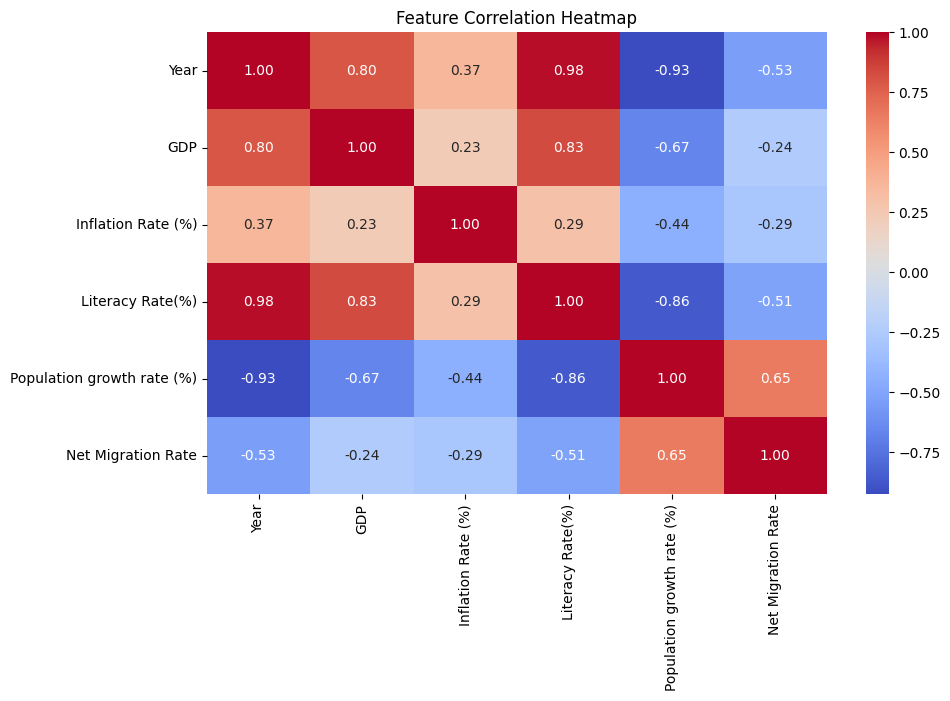

Index(['Year', 'GDP', 'Inflation Rate (%)', 'Literacy Rate(%)',
       'Population growth rate (%)', 'Net Migration Rate'],
      dtype='object')


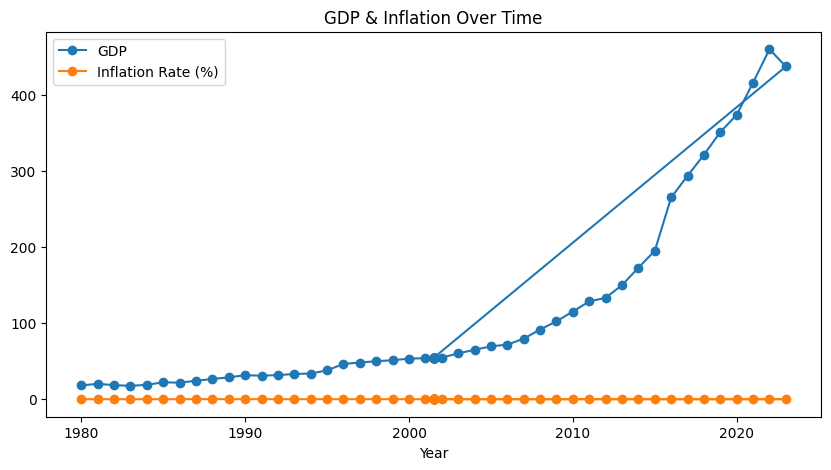

Index(['Year', 'GDP', 'Inflation Rate (%)', 'Literacy Rate(%)',
       'Population growth rate (%)', 'Net Migration Rate'],
      dtype='object')


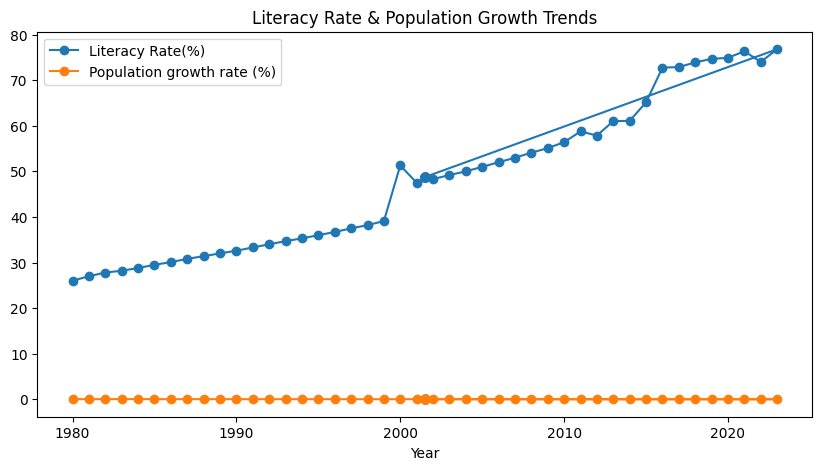

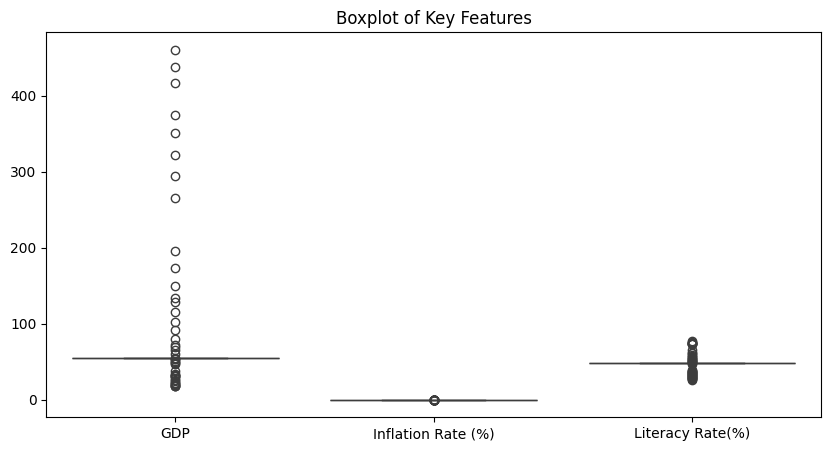

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# GDP & Inflation trends
# Print the available columns to check for 'Inflation Rate'
print(data.columns)
# Change 'Inflation Rate' to the actual column name if different
# For example, if the actual column name is 'InflationRate', use the following:
data.plot(x='Year', y=['GDP', 'Inflation Rate (%)'], kind='line', marker='o', figsize=(10, 5))
plt.title("GDP & Inflation Over Time")
plt.show()

# Literacy vs Population Growth
# Similarly, ensure that 'Literacy Rate' and 'Population Growth' are correct column names
print(data.columns)
# Change 'Literacy Rate' and 'Population Growth' to the actual column names if different
data.plot(x='Year', y=['Literacy Rate(%)', 'Population growth rate (%)'], kind='line', marker='o', figsize=(10, 5))
plt.title("Literacy Rate & Population Growth Trends")
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['GDP', 'Inflation Rate (%)', 'Literacy Rate(%)']]) # Ensure column names are correct here as well
plt.title("Boxplot of Key Features")
plt.show()